In [32]:
import numpy as np
np.set_printoptions(threshold=np.inf)


import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})
plt.rcParams.update({'lines.linewidth': 3})
plt.rcParams['figure.figsize'] = [5, 3]
%matplotlib notebook

In [87]:
fil = open('SolarSpectrumForEx1.txt', 'r')
fil.readline()
fil.readline()
wavelength, flux =  list(zip(*[list(map(float, line.split())) for line in fil.readlines()]))
fil.close()

wavelength = np.array(wavelength)
flux = np.array(flux)

In [39]:
dwavelengths = (wavelength-np.roll(wavelength,1))[1:]
fluxes = 0.5*(flux+np.roll(flux,1))[1:]
np.sum(fluxes*dwavelengths)

1366.0907655249998

In [96]:
R_ang = (16 * np.pi/(60*180))
Teff = (1366 / ( 5.7*10**(-8) * R_ang**2) )**(1/4)

In [97]:
h = 6.626 * 10**(-34) #m^2 kg s^-1
c = 2.99792458 *10**(-8) #m s^-1
kB = 1.38 * 10**(-23) #m^2 kg s^-2 K^-1
r_E = 148 * 10**9 #m
def planck(lam, T):
    return 2*h*c**2/lam**5 *(np.e**((h*c)/(lam * kB * T)) - 1)**(-1)


<IPython.core.display.Javascript object>


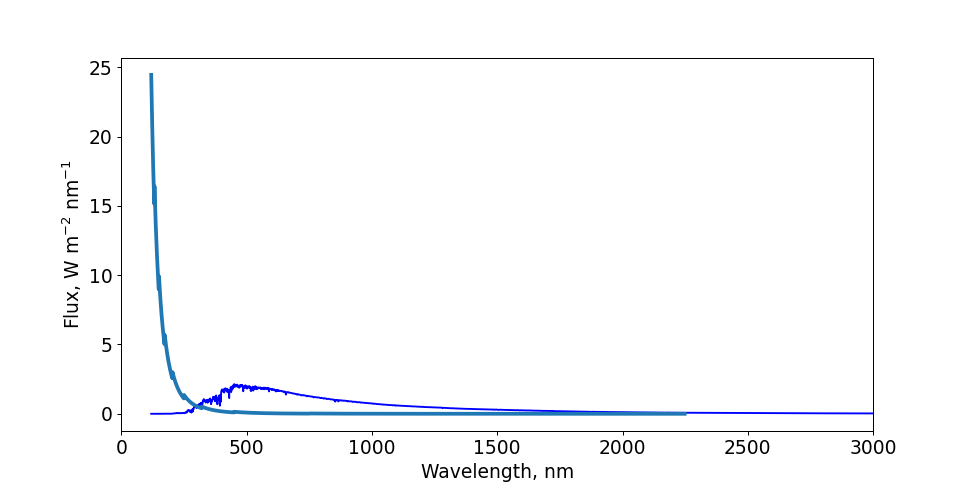

/var/folders/9n/9ns41j1x0jdcqlh3lyjgx9yr0000gn/T/ipykernel_84655/846221323.py:6: RuntimeWarning: divide by zero encountered in reciprocal
  return 2*h*c**2/lam**5 *(np.e**((h*c)/(lam * kB * T)) - 1)**(-1)


In [98]:
plt.figure(figsize=(12,6))
plt.plot(wavelength, flux, linewidth=1.5, color='b')
plt.xlim(0,3000)
plt.xlabel('Wavelength, nm')
plt.ylabel('Flux, W m$^{-2}$ nm$^{-1}$')
# plt.savefig('spectrum.png', dpi=300)
plt.plot(wavelength, planck(np.array(wavelength*10**(-9)), Teff))

In [84]:
planck(0.001,100)